## EIA Monthly Electric Grid Data - Generation Capacity
## Exploratory Data Analysis

https://www.eia.gov/electricity/gridmonitor/about

In [3]:
import pandas as pd
import numpy as np

# genops.csv was retrieved from the U.S. Energy Information Administration API using code 
# in EIA_GetData3.ipynb
csv_path = 'gencap.csv'

gencap = pd.read_csv(csv_path, low_memory=False)
gencap.shape

#eia_data['value'] = pd.to_numeric(eia_data['value'], errors='coerce')
#eia_data['period'] = pd.to_datetime(eia_data['period'], yearfirst=True, errors='coerce')
#eia_data = eia_data.rename(columns = {'value':'MWh'})
#eia_data = eia_data[['period','respondent','respondent_name', 'type', 'type_name', 'MWh']]

(3685302, 28)

In [4]:
gencap = gencap.drop_duplicates()
gencap.shape

(3328381, 28)

In [5]:
gencap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3328381 entries, 0 to 3685301
Data columns (total 28 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   period                        object 
 1   stateid                       object 
 2   stateName                     object 
 3   sector                        object 
 4   sectorName                    object 
 5   entityid                      object 
 6   entityName                    object 
 7   plantid                       object 
 8   plantName                     object 
 9   generatorid                   object 
 10  technology                    object 
 11  energy_source_code            object 
 12  energy-source-desc            object 
 13  prime_mover_code              object 
 14  balancing_authority_code      object 
 15  balancing-authority-name      object 
 16  status                        object 
 17  statusDescription             object 
 18  county                     

In [6]:
gencap.head()

,period,stateid,stateName,sector,sectorName,entityid,entityName,plantid,plantName,generatorid,...,county,latitude,longitude,nameplate-capacity-mw,net-summer-capacity-mw,net-winter-capacity-mw,unit,nameplate-capacity-mw-units,net-summer-capacity-mw-units,net-winter-capacity-mw-units
0,2022-12,VA,Virginia,commercial-non-chp,Commercial Non-CHP,4496,Covanta Alexandria/Arlington,50663,Covanta Alexandria/Arlington Energy,GEN2,...,Alexandria City,38.8014,-77.1288,14.5,14.5,14.5,NaN,MW,MW,MW
1,2022-12,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",59157,Pecan PV1,PEC1,...,Richmond,34.909167,-79.829444,5.0,5.0,5.0,NaN,MW,MW,MW
2,2022-12,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",59518,Grandy PV 1,GRAND,...,Currituck,36.233611,-75.880833,20.0,20.0,20.0,NaN,MW,MW,MW
3,2022-12,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",59517,Baker PV 1,BAKE1,...,Hertford,36.270278,-77.060278,5.0,5.0,5.0,NaN,MW,MW,MW
4,2022-12,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",59516,American Legion PV 1,AMLEG,...,Halifax,36.418333,-77.655833,16.0,16.0,16.0,NaN,MW,MW,MW


In [7]:
gencap.columns = gencap.columns.str.replace('-', '_')
gencap['period'] = pd.to_datetime(gencap['period'], yearfirst=True, errors='coerce')
gencap['nameplate_capacity_mw'] = pd.to_numeric(gencap['nameplate_capacity_mw'], errors='coerce')
gencap['latitude'] = pd.to_numeric(gencap['latitude'], errors='coerce')
gencap['longitude'] = pd.to_numeric(gencap['longitude'], errors='coerce')
gencap['plantid'] = 'P' + gencap['plantid'].astype(str)


In [8]:
gencap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3328381 entries, 0 to 3685301
Data columns (total 28 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   period                        datetime64[ns]
 1   stateid                       object        
 2   stateName                     object        
 3   sector                        object        
 4   sectorName                    object        
 5   entityid                      object        
 6   entityName                    object        
 7   plantid                       object        
 8   plantName                     object        
 9   generatorid                   object        
 10  technology                    object        
 11  energy_source_code            object        
 12  energy_source_desc            object        
 13  prime_mover_code              object        
 14  balancing_authority_code      object        
 15  balancing_authority_name      object 

In [9]:
e_src = gencap[['energy_source_code', 'energy_source_desc']]
e_src.drop_duplicates()

,energy_source_code,energy_source_desc
0,MSW,Municipal Solid Waste (All)
1,SUN,Solar
24,DFO,Disillate Fuel Oil
33,WND,Wind
44,NG,Natural Gas
55,LFG,Landfill Gas
62,WH,Waste Heat
149,SUB,Subbituminous Coal
150,WAT,Water
192,MWH,Electricity used for energy storage


In [10]:
e_src.shape

(3328381, 2)

In [11]:
e_src = e_src.drop_duplicates().dropna().set_index('energy_source_code').transpose()
e_src

energy_source_code,MSW,SUN,DFO,WND,NG,LFG,WH,SUB,WAT,MWH,...,OBL,BFG,WDL,PG,Operating,SGC,SGP,OBS,TDF,SLW
energy_source_desc,Municipal Solid Waste (All),Solar,Disillate Fuel Oil,Wind,Natural Gas,Landfill Gas,Waste Heat,Subbituminous Coal,Water,Electricity used for energy storage,...,Other Biomass Liquids,Blast-Furnace Gas,Wood Waste Liquids,Gaseous Propane,Brevard,Coal-Derived Synthesis Gas,Synthesis Gas from Petroleum Coke,Other Biomass Solids,Tire-Derived Fuel,Sludge waste


In [12]:
print(e_src)

energy_source_code                          MSW    SUN                 DFO   
energy_source_desc  Municipal Solid Waste (All)  Solar  Disillate Fuel Oil  \

energy_source_code   WND           NG           LFG          WH   
energy_source_desc  Wind  Natural Gas  Landfill Gas  Waste Heat  \

energy_source_code                 SUB    WAT   
energy_source_desc  Subbituminous Coal  Water  \

energy_source_code                                  MWH  ...   
energy_source_desc  Electricity used for energy storage  ...  \

energy_source_code                     OBL                BFG   
energy_source_desc  Other Biomass Liquids   Blast-Furnace Gas  \

energy_source_code                 WDL               PG Operating   
energy_source_desc  Wood Waste Liquids  Gaseous Propane   Brevard  \

energy_source_code                         SGC   
energy_source_desc  Coal-Derived Synthesis Gas  \

energy_source_code                                SGP                   OBS   
energy_source_desc  Synthesis 

In [13]:
e_src_dict = e_src.to_dict()
print(e_src_dict)

{'MSW': {'energy_source_desc': 'Municipal Solid Waste (All)'}, 'SUN': {'energy_source_desc': 'Solar'}, 'DFO': {'energy_source_desc': 'Disillate Fuel Oil'}, 'WND': {'energy_source_desc': 'Wind'}, 'NG': {'energy_source_desc': 'Natural Gas'}, 'LFG': {'energy_source_desc': 'Landfill Gas'}, 'WH': {'energy_source_desc': 'Waste Heat'}, 'SUB': {'energy_source_desc': 'Subbituminous Coal'}, 'WAT': {'energy_source_desc': 'Water'}, 'MWH': {'energy_source_desc': 'Electricity used for energy storage'}, 'BIT': {'energy_source_desc': 'Bituminous Coal'}, 'RFO': {'energy_source_desc': 'Residual Fuel Oil'}, 'RC': {'energy_source_desc': 'Refined Coal'}, 'OG': {'energy_source_desc': 'Other Gas'}, 'OBG': {'energy_source_desc': 'Other Biomass Gases '}, 'WDS': {'energy_source_desc': 'Wood Waste Solids'}, 'GEO': {'energy_source_desc': 'Geothermal'}, 'BLQ': {'energy_source_desc': 'Black Liquor'}, 'JF': {'energy_source_desc': 'Jet Fuel'}, 'PC': {'energy_source_desc': 'Petroleum Coke'}, 'OTH': {'energy_source_des

In [14]:
import json
e_src_dict_fname = 'e_src_dict.json'
with open(e_src_dict_fname, "w") as outfile:
    json.dump(e_src_dict, outfile, indent=4)

In [15]:
gencap.head()

,period,stateid,stateName,sector,sectorName,entityid,entityName,plantid,plantName,generatorid,...,county,latitude,longitude,nameplate_capacity_mw,net_summer_capacity_mw,net_winter_capacity_mw,unit,nameplate_capacity_mw_units,net_summer_capacity_mw_units,net_winter_capacity_mw_units
0,2022-12-01,VA,Virginia,commercial-non-chp,Commercial Non-CHP,4496,Covanta Alexandria/Arlington,P50663,Covanta Alexandria/Arlington Energy,GEN2,...,Alexandria City,38.801400,-77.128800,14.5,14.5,14.5,NaN,MW,MW,MW
1,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59157,Pecan PV1,PEC1,...,Richmond,34.909167,-79.829444,5.0,5.0,5.0,NaN,MW,MW,MW
2,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59518,Grandy PV 1,GRAND,...,Currituck,36.233611,-75.880833,20.0,20.0,20.0,NaN,MW,MW,MW
3,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59517,Baker PV 1,BAKE1,...,Hertford,36.270278,-77.060278,5.0,5.0,5.0,NaN,MW,MW,MW
4,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59516,American Legion PV 1,AMLEG,...,Halifax,36.418333,-77.655833,16.0,16.0,16.0,NaN,MW,MW,MW


<Axes: xlabel='period'>

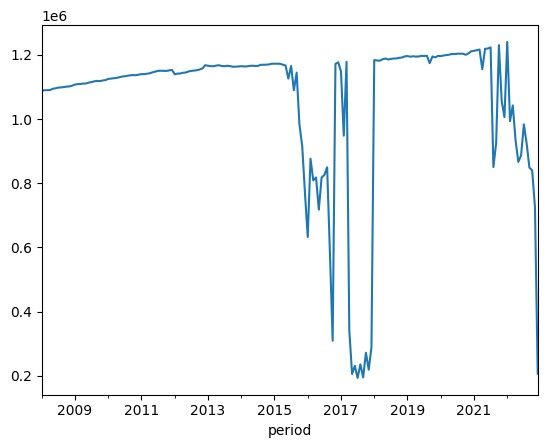

In [16]:
gencap.groupby('period')['nameplate_capacity_mw'].sum().plot(x='period',y='nameplate_capacity_mw')

<Axes: >

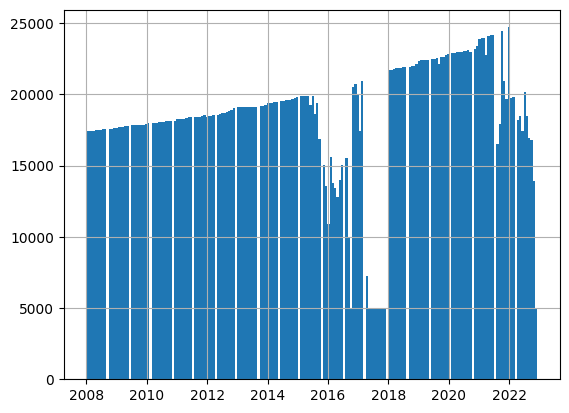

In [17]:
gencap['period'].hist(bins=200)

In [18]:
gencap.describe(include=['O']).T

,count,unique,top,freq
stateid,3328381,52,CA,358600
stateName,3328381,52,California,358600
sector,3328381,12,electric-utility,1562710
sectorName,3328381,8,Electric Utility,1562710
entityid,3328381,6937,55938,65644
entityName,3328219,8058,Industrial Power Generating Company LLC,65644
plantid,3328381,12914,P1751,12271
plantName,3328326,13692,Edison Sault,12271
generatorid,3328326,8941,1,461426
technology,3328326,28,Conventional Hydroelectric,658348


In [19]:
gencap.describe().T

,count,mean,min,25%,50%,75%,max,std
period,3328371,2015-08-19 03:33:45.127967488,2008-01-01 00:00:00,2011-11-01 00:00:00,2015-06-01 00:00:00,2019-09-01 00:00:00,2022-12-01 00:00:00,NaN
latitude,3318897.0,39.267638,0.675,35.206741,39.7475,42.6986,71.2925,6.263111
longitude,3318125.0,-70.819358,-291.131944,-100.209167,-87.3819,-75.602031,171.7375,65.162176
nameplate_capacity_mw,3328283.0,57.325372,0.1,1.5,5.4,53.1,1499.4,134.392469
net_summer_capacity_mw,3308530.0,52.714325,-6.0,1.4,5.0,47.0,2353.2,127.585067
net_winter_capacity_mw,3307588.0,54.696102,-6.0,1.4,5.0,49.0,2353.2,130.112709


<Axes: xlabel='period'>

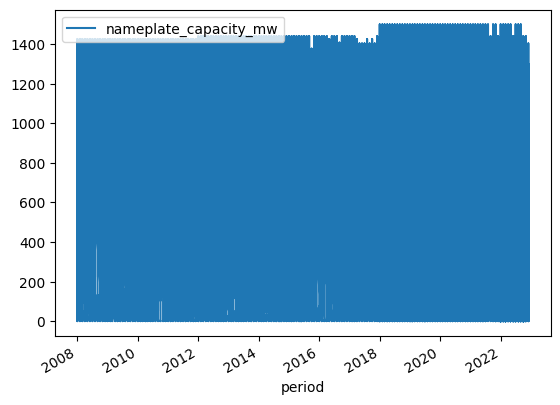

In [20]:
gencap.plot(x='period', y='nameplate_capacity_mw')

<Axes: >

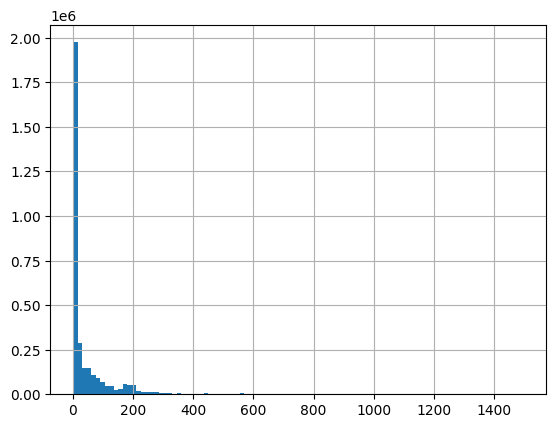

In [21]:
gencap.nameplate_capacity_mw.hist(bins=100)

In [22]:
#retain full gencap
gencap_full = gencap.copy()

In [23]:
#group by BA using gencap data
gencap['statusDescription'].unique()


array(['Operating',
       'Standby/Backup: available for service but not normally used',
       'Out of service but expected to return to service in next calendar year',
       'Out of service and NOT expected to return to service in next calendar year',
       nan, '180.0', '157.0', '156.0', '155.0'], dtype=object)

In [24]:
gencap['status'].unique()

array(['OP', 'SB', 'OA', 'OS', nan, '163.0', '163.8', '157.0', '156.0',
       '155.0'], dtype=object)

In [25]:
gencap.shape

(3328381, 28)

In [26]:
gencap = gencap[gencap.status.isin(['OP','SB'])]
gencap.shape

(3236151, 28)

In [27]:
ba_av_loc= pd.DataFrame(gencap.groupby('balancing_authority_code')['latitude'].mean())
ba_av_loc['av_lon'] = gencap.groupby('balancing_authority_code')['longitude'].mean()
ba_av_loc = ba_av_loc.rename(columns = {'latitude':'av_lat'})
ba_av_loc.head()

,av_lat,av_lon
balancing_authority_code,,
AEC,31.264961,-86.674599
AECI,39.519761,-92.645823
AVA,47.737400,-117.227262
AVRN,44.554223,-120.851520
AZPS,33.446555,-112.508441


In [28]:
gencap = gencap[['period','balancing_authority_code','energy_source_code','nameplate_capacity_mw']]
gencap.head()

,period,balancing_authority_code,energy_source_code,nameplate_capacity_mw
0,2022-12-01,PJM,MSW,14.5
1,2022-12-01,CPLE,SUN,5.0
2,2022-12-01,PJM,SUN,20.0
3,2022-12-01,PJM,SUN,5.0
4,2022-12-01,PJM,SUN,16.0


In [29]:
gencap = gencap.rename(columns={'balancing_authority_code':'balancing_auth', 'energy_source_code':'energy_source', \
                       'nameplate_capacity_mw':'np_cap_mw'})
gencap.head()

,period,balancing_auth,energy_source,np_cap_mw
0,2022-12-01,PJM,MSW,14.5
1,2022-12-01,CPLE,SUN,5.0
2,2022-12-01,PJM,SUN,20.0
3,2022-12-01,PJM,SUN,5.0
4,2022-12-01,PJM,SUN,16.0


In [30]:
import json

BA_dict_fname = 'BA_dict.json'
with open(BA_dict_fname, "r") as infile:
    BA_dict = json.load(infile)
print(BA_dict)

{'YAD': {'BA_Name': 'Alcoa Power Generating, Inc. - Yadkin Division', 'Time_Zone': 'Eastern', 'Region_Country_Code': 'CAR', 'Region_Country_Name': 'Carolinas', 'Generation_Only_BA': 'Yes', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'AZPS': {'BA_Name': 'Arizona Public Service Company', 'Time_Zone': 'Arizona', 'Region_Country_Code': 'SW', 'Region_Country_Name': 'Southwest', 'Generation_Only_BA': 'No', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'DEAA': {'BA_Name': 'Arlington Valley, LLC', 'Time_Zone': 'Arizona', 'Region_Country_Code': 'SW', 'Region_Country_Name': 'Southwest', 'Generation_Only_BA': 'Yes', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'AECI': {'BA_Name': 'Associated Electric Cooperative, Inc.', 'Time_Zone': 'Central', 'Region_Country_Code': 'MIDW', 'Region_Country_

In [31]:
#remove non-US BAs, and larger regions
gencap = gencap[gencap.balancing_auth.isin(BA_dict.keys())]
gencap.shape

(2090371, 4)

In [32]:
merge_other = ['BLQ','WDL','BFG','OBL','PUR','AB','WDS','OBG','OG','MWH','WH','LFG','OBS']
gencap['energy_source'] = gencap['energy_source'].apply(lambda f: 'OTH' if f in merge_other else f)
gencap.head()

,period,balancing_auth,energy_source,np_cap_mw
0,2022-12-01,PJM,MSW,14.5
1,2022-12-01,CPLE,SUN,5.0
2,2022-12-01,PJM,SUN,20.0
3,2022-12-01,PJM,SUN,5.0
4,2022-12-01,PJM,SUN,16.0


In [33]:
gencap = gencap.groupby(['period', 'balancing_auth', 'energy_source'], as_index = False) \
    ['np_cap_mw'].aggregate('sum')
gencap.shape
gencap.head()

,period,balancing_auth,energy_source,np_cap_mw
0,2013-01-01,AEC,BIT,538.0
1,2013-01-01,AEC,NG,1330.0
2,2013-01-01,AEC,OTH,4.8
3,2013-01-01,AEC,WAT,8.2
4,2013-01-01,AECI,DFO,143.5


In [34]:
gencap.head(20)

,period,balancing_auth,energy_source,np_cap_mw
0,2013-01-01,AEC,BIT,538.0
1,2013-01-01,AEC,NG,1330.0
2,2013-01-01,AEC,OTH,4.8
3,2013-01-01,AEC,WAT,8.2
4,2013-01-01,AECI,DFO,143.5
5,2013-01-01,AECI,NG,3063.5
6,2013-01-01,AECI,SUB,2481.7
7,2013-01-01,AECI,WAT,106.2
8,2013-01-01,AECI,WND,312.5
9,2013-01-01,AVA,DFO,2.8


In [35]:
gencap.energy_source.unique()

array(['BIT', 'NG', 'OTH', 'WAT', 'DFO', 'SUB', 'WND', 'MSW', 'SUN',
       'GEO', 'NUC', 'JF', 'PC', 'PG', 'RC', 'LIG', 'RFO', 'KER', 'SGP',
       'WC', 'WO', 'SGC', 'TDF', 'SLW'], dtype=object)

In [36]:
gencap_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3328381 entries, 0 to 3685301
Data columns (total 28 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   period                        datetime64[ns]
 1   stateid                       object        
 2   stateName                     object        
 3   sector                        object        
 4   sectorName                    object        
 5   entityid                      object        
 6   entityName                    object        
 7   plantid                       object        
 8   plantName                     object        
 9   generatorid                   object        
 10  technology                    object        
 11  energy_source_code            object        
 12  energy_source_desc            object        
 13  prime_mover_code              object        
 14  balancing_authority_code      object        
 15  balancing_authority_name      object 

In [37]:
gencap_full.head()

,period,stateid,stateName,sector,sectorName,entityid,entityName,plantid,plantName,generatorid,...,county,latitude,longitude,nameplate_capacity_mw,net_summer_capacity_mw,net_winter_capacity_mw,unit,nameplate_capacity_mw_units,net_summer_capacity_mw_units,net_winter_capacity_mw_units
0,2022-12-01,VA,Virginia,commercial-non-chp,Commercial Non-CHP,4496,Covanta Alexandria/Arlington,P50663,Covanta Alexandria/Arlington Energy,GEN2,...,Alexandria City,38.801400,-77.128800,14.5,14.5,14.5,NaN,MW,MW,MW
1,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59157,Pecan PV1,PEC1,...,Richmond,34.909167,-79.829444,5.0,5.0,5.0,NaN,MW,MW,MW
2,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59518,Grandy PV 1,GRAND,...,Currituck,36.233611,-75.880833,20.0,20.0,20.0,NaN,MW,MW,MW
3,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59517,Baker PV 1,BAKE1,...,Hertford,36.270278,-77.060278,5.0,5.0,5.0,NaN,MW,MW,MW
4,2022-12-01,NC,North Carolina,ipp-non-chp,IPP Non-CHP,58970,"Ecoplexus, Inc",P59516,American Legion PV 1,AMLEG,...,Halifax,36.418333,-77.655833,16.0,16.0,16.0,NaN,MW,MW,MW


In [38]:
ba_plants = gencap_full[['plantid', 'balancing_authority_code']].rename(columns={ \
    'plantid':'plant_id', 'balancing_authority_code':'ba_code'}).drop_duplicates() \
    .set_index('plant_id').dropna()

ba_plants.head()


,ba_code
plant_id,
P50663,PJM
P59157,CPLE
P59518,PJM
P59517,PJM
P59516,PJM


In [39]:
plant_ba_dict = ba_plants.transpose().to_dict(orient='index')['ba_code']
plant_ba_dict

C:\Users\lilye\AppData\Local\Temp\ipykernel_5632\3242105545.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  plant_ba_dict = ba_plants.transpose().to_dict(orient='index')['ba_code']


{'P50663': 'PJM',
 'P59157': 'CPLE',
 'P59518': 'PJM',
 'P59517': 'PJM',
 'P59516': 'PJM',
 'P59515': 'PJM',
 'P59156': 'CPLE',
 'P64655': 'WACM',
 'P64654': 'WACM',
 'P64653': 'WACM',
 'P64652': 'WACM',
 'P64651': 'WACM',
 'P64650': 'WACM',
 'P64649': 'WACM',
 'P64648': 'WACM',
 'P64647': 'PJM',
 'P64646': 'PJM',
 'P64645': 'PJM',
 'P64644': 'PJM',
 'P64643': 'PJM',
 'P64642': 'PJM',
 'P64608': 'PJM',
 'P64606': 'PJM',
 'P64605': 'ISNE',
 'P63646': 'NYIS',
 'P63645': 'PJM',
 'P58102': 'CISO',
 'P58101': 'CISO',
 'P58096': 'PJM',
 'P58095': 'PJM',
 'P58094': 'PJM',
 'P58093': 'PJM',
 'P58085': 'CISO',
 'P58091': 'PJM',
 'P58084': 'ISNE',
 'P58080': 'ERCO',
 'P58079': 'PJM',
 'P65580': 'ERCO',
 'P61652': 'MISO',
 'P56544': 'MISO',
 'P61028': 'PJM',
 'P50624': 'CISO',
 'P59312': 'SWPP',
 'P59311': 'SWPP',
 'P64483': 'MISO',
 'P64482': 'MISO',
 'P64479': 'MISO',
 'P64154': 'MISO',
 'P64153': 'MISO',
 'P63987': 'MISO',
 'P63726': 'MISO',
 'P63725': 'MISO',
 'P63724': 'MISO',
 'P63249': 'MI

In [40]:
plant_ba_dict_fname = 'plant_ba_dict.json'
with open(plant_ba_dict_fname, "w") as outfile:
    json.dump(plant_ba_dict, outfile, indent=4)

In [41]:
# NaN balancing authorities were dropped from plant:ba dict
# example NaN BA in Alaska:
gencap_full[gencap_full.plantid == 'P55966'].iloc[0]

period                                       2022-12-01 00:00:00
stateid                                                       AK
stateName                                                 Alaska
sector                                          electric-utility
sectorName                                      Electric Utility
entityid                                                   19558
entityName                               Homer Electric Assn Inc
plantid                                                   P55966
plantName                                 Nikiski Combined Cycle
generatorid                                                  ST1
technology                      Natural Gas Fired Combined Cycle
energy_source_code                                            NG
energy_source_desc                                   Natural Gas
prime_mover_code                                              CA
balancing_authority_code                                     NaN
balancing_authority_name 

In [42]:
gencap.head()

,period,balancing_auth,energy_source,np_cap_mw
0,2013-01-01,AEC,BIT,538.0
1,2013-01-01,AEC,NG,1330.0
2,2013-01-01,AEC,OTH,4.8
3,2013-01-01,AEC,WAT,8.2
4,2013-01-01,AECI,DFO,143.5


In [43]:
gencap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40946 entries, 0 to 40945
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   period          40946 non-null  datetime64[ns]
 1   balancing_auth  40946 non-null  object        
 2   energy_source   40946 non-null  object        
 3   np_cap_mw       40946 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.2+ MB


In [44]:
gencap = gencap.rename(columns={'balancing_auth':'ba_code', 'energy_source':'energy_src', \
                       'np_cap_mw':'capacity_mw'})

In [45]:
merge_other = ['BLQ','WDL','BFG','OBL','PUR','AB','WDS','OBG','OG','MWH','WH','LFG','OBS']
gencap['energy_src'] = gencap['energy_src'].apply(lambda f: 'OTH' if f in merge_other else f)
gencap.head()

,period,ba_code,energy_src,capacity_mw
0,2013-01-01,AEC,BIT,538.0
1,2013-01-01,AEC,NG,1330.0
2,2013-01-01,AEC,OTH,4.8
3,2013-01-01,AEC,WAT,8.2
4,2013-01-01,AECI,DFO,143.5


In [46]:
gencap.energy_src.unique()

array(['BIT', 'NG', 'OTH', 'WAT', 'DFO', 'SUB', 'WND', 'MSW', 'SUN',
       'GEO', 'NUC', 'JF', 'PC', 'PG', 'RC', 'LIG', 'RFO', 'KER', 'SGP',
       'WC', 'WO', 'SGC', 'TDF', 'SLW'], dtype=object)

In [47]:
gencap.head()

,period,ba_code,energy_src,capacity_mw
0,2013-01-01,AEC,BIT,538.0
1,2013-01-01,AEC,NG,1330.0
2,2013-01-01,AEC,OTH,4.8
3,2013-01-01,AEC,WAT,8.2
4,2013-01-01,AECI,DFO,143.5


<Axes: ylabel='energy_src'>

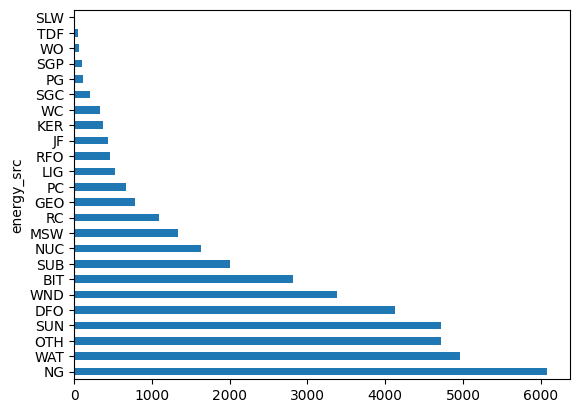

In [57]:
gencap['energy_src'].value_counts().plot(kind='barh')

<Axes: ylabel='energy_src'>

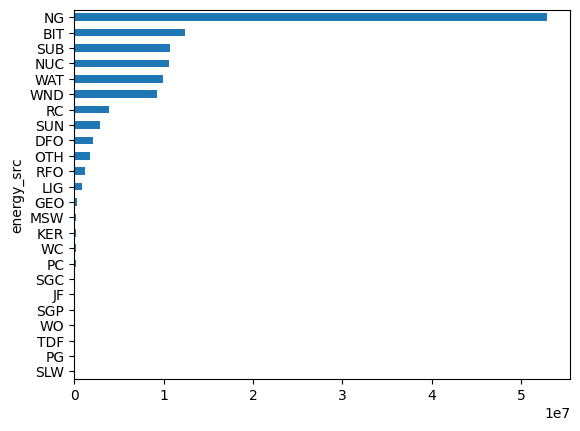

In [64]:
gencap.groupby(by='energy_src')['capacity_mw'].sum().sort_values().plot(kind='barh')

<Axes: ylabel='energy_src'>

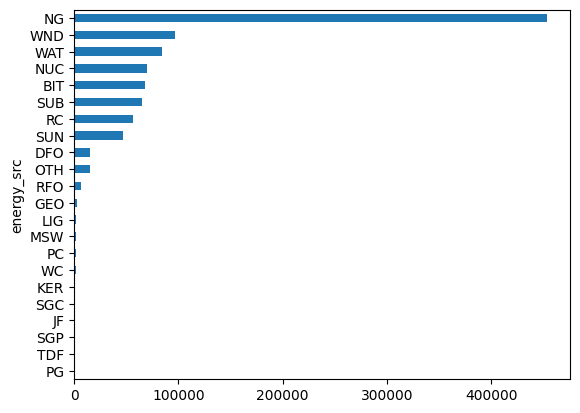

In [65]:
# should be more accurate because it's limited to one month
gencap[gencap.period == '2021-12-01'].groupby(by='energy_src')['capacity_mw'].sum().sort_values().plot(kind='barh')

In [ ]:
#consider removing features - everything with less installed capacity than GEO? Or WC?

In [102]:
gencap[gencap.ba_code == 'WWA']

,period,ba_code,energy_src,capacity_mw
349,2013-01-01,WWA,WND,189.0
699,2013-02-01,WWA,WND,189.0
1049,2013-03-01,WWA,WND,189.0
1399,2013-04-01,WWA,WND,189.0
1749,2013-05-01,WWA,WND,189.0
...,...,...,...,...
39129,2022-06-01,WWA,WND,189.0
39466,2022-07-01,WWA,WND,189.0
39804,2022-08-01,WWA,WND,189.0
40123,2022-09-01,WWA,WND,189.0


In [103]:
genconf = gencap.pivot(index=['ba_code','period'], columns='energy_src', values='capacity_mw')
genconf.head()

energy_src            BIT  DFO  GEO  JF  KER  LIG  MSW      NG  NUC  OTH  ...   
ba_code period                                                            ...   
AEC     2013-01-01  538.0  NaN  NaN NaN  NaN  NaN  NaN  1330.0  NaN  4.8  ...  \
        2013-02-01  538.0  NaN  NaN NaN  NaN  NaN  NaN  1330.0  NaN  4.8  ...   
        2013-03-01  538.0  NaN  NaN NaN  NaN  NaN  NaN  1330.0  NaN  4.8  ...   
        2013-04-01  538.0  NaN  NaN NaN  NaN  NaN  NaN  1330.0  NaN  4.8  ...   
        2013-05-01  538.0  NaN  NaN NaN  NaN  NaN  NaN  1330.0  NaN  4.8  ...   

energy_src          SGC  SGP  SLW  SUB  SUN  TDF  WAT  WC  WND  WO  
ba_code period                                                      
AEC     2013-01-01  NaN  NaN  NaN  NaN  NaN  NaN  8.2 NaN  NaN NaN  
        2013-02-01  NaN  NaN  NaN  NaN  NaN  NaN  8.2 NaN  NaN NaN  
        2013-03-01  NaN  NaN  NaN  NaN  NaN  NaN  8.2 NaN  NaN NaN  
        2013-04-01  NaN  NaN  NaN  NaN  NaN  NaN  8.2 NaN  NaN NaN  
        2013-05-01  NaN  NaN  NaN  NaN  NaN  NaN  8.2 NaN  NaN NaN  

[5 rows x 24 columns]

In [104]:
genconf = genconf.fillna(0)

In [106]:
genconf.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7500 entries, ('AEC', Timestamp('2013-01-01 00:00:00')) to ('YAD', Timestamp('2022-11-01 00:00:00'))
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BIT     7500 non-null   float64
 1   DFO     7500 non-null   float64
 2   GEO     7500 non-null   float64
 3   JF      7500 non-null   float64
 4   KER     7500 non-null   float64
 5   LIG     7500 non-null   float64
 6   MSW     7500 non-null   float64
 7   NG      7500 non-null   float64
 8   NUC     7500 non-null   float64
 9   OTH     7500 non-null   float64
 10  PC      7500 non-null   float64
 11  PG      7500 non-null   float64
 12  RC      7500 non-null   float64
 13  RFO     7500 non-null   float64
 14  SGC     7500 non-null   float64
 15  SGP     7500 non-null   float64
 16  SLW     7500 non-null   float64
 17  SUB     7500 non-null   float64
 18  SUN     7500 non-null   float64
 19  TDF     7500 non-null   float64
 2

In [62]:
genconf.describe()

energy_src,BIT,DFO,GEO,JF,KER,LIG,MSW,NG,NUC,OTH,...,SGC,SGP,SLW,SUB,SUN,TDF,WAT,WC,WND,WO
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,1660.619200,273.840800,49.673413,4.653093,33.707320,111.257307,34.764747,7046.432133,1414.688867,236.817827,...,13.109853,2.505440,0.004307,1424.853760,392.649747,0.432000,1321.684720,24.303587,1232.473427,0.489280
std,6055.167717,850.769002,260.131469,27.035593,191.305636,670.243976,121.340220,15594.661801,4537.154152,622.459935,...,93.549924,24.030777,0.090362,4993.522452,1359.015395,6.220815,2804.618119,187.226353,3923.042177,6.655782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,255.850000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1325.100000,0.000000,13.800000,...,0.000000,0.000000,0.000000,0.000000,15.100000,0.000000,225.200000,0.000000,0.000000,0.000000
75%,931.500000,95.800000,0.000000,0.000000,0.000000,0.000000,0.000000,4590.200000,0.000000,170.200000,...,0.000000,0.000000,0.000000,242.000000,213.200000,0.000000,1227.525000,0.000000,406.625000,0.000000
max,69847.000000,6576.400000,2170.500000,223.500000,1442.100000,7686.900000,795.500000,98687.100000,35975.700000,4582.000000,...,804.500000,304.500000,1.900000,53206.700000,15852.300000,135.000000,20422.600000,1790.900000,32700.200000,100.000000


In [107]:
genconf = genconf.reset_index()

In [108]:
genconf.head()

energy_src,ba_code,period,BIT,DFO,GEO,JF,KER,LIG,MSW,NG,...,SGC,SGP,SLW,SUB,SUN,TDF,WAT,WC,WND,WO
0,AEC,2013-01-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0
1,AEC,2013-02-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0
2,AEC,2013-03-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0
3,AEC,2013-04-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0
4,AEC,2013-05-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0


In [70]:
genconf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ba_code  7500 non-null   object        
 1   period   7500 non-null   datetime64[ns]
 2   BIT      7500 non-null   float64       
 3   DFO      7500 non-null   float64       
 4   GEO      7500 non-null   float64       
 5   JF       7500 non-null   float64       
 6   KER      7500 non-null   float64       
 7   LIG      7500 non-null   float64       
 8   MSW      7500 non-null   float64       
 9   NG       7500 non-null   float64       
 10  NUC      7500 non-null   float64       
 11  OTH      7500 non-null   float64       
 12  PC       7500 non-null   float64       
 13  PG       7500 non-null   float64       
 14  RC       7500 non-null   float64       
 15  RFO      7500 non-null   float64       
 16  SGC      7500 non-null   float64       
 17  SGP      7500 non-null   float64 

In [109]:
genconf = genconf.set_index('ba_code').join(ba_av_loc)
genconf.head()

,period,BIT,DFO,GEO,JF,KER,LIG,MSW,NG,NUC,...,SLW,SUB,SUN,TDF,WAT,WC,WND,WO,av_lat,av_lon
AEC,2013-01-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
AEC,2013-02-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
AEC,2013-03-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
AEC,2013-04-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
AEC,2013-05-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599


In [111]:
genconf = genconf.reset_index()

In [116]:
genconf = genconf.rename(columns={'index':'ba_code'}).set_index('ba_code')

In [117]:
genconf.head()

,period,BIT,DFO,GEO,JF,KER,LIG,MSW,NG,NUC,...,SLW,SUB,SUN,TDF,WAT,WC,WND,WO,av_lat,av_lon
ba_code,,,,,,,,,,,,,,,,,,,,,
AEC,2013-01-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
AEC,2013-02-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
AEC,2013-03-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
AEC,2013-04-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
AEC,2013-05-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,0.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599


In [118]:
# save genconf to csv
genconf_fname = 'genconf.csv'
with open(genconf_fname, 'w') as outfile:
    genconf.to_csv(outfile)